In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

# **Loading dataset**

In [ ]:
path = "/content/drive/MyDrive/ML_Final/churn_rate_prediction.csv"
data = pd.read_csv(path)
data.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

**From the above results, we can conclude and note the following:**
* Attributes contain missing values including **region_category**, **preferred_offer_types**, **points_in_wallet**
* **joining_date**  Represents the date when a customer became a member, but the attribute is currently recorded with a type data is an object. It must be converted to **DateTime**-type data. Similarly, the **last_visit_time** attribute has the same problem.  **last_visit_time** is represented the last time a customer visited the website

In [ ]:
# Description of statistics in numeric format (default format)
data.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


**From the above results, we can conclude and note the following**
* **days_since_last_login**: Represents the no. of days since a customer last logged into the website, so values of the attribute must be positive integers.
* According to the distribution table, we can see **days_since_last_login** has outliers due to having a minimum value is -999. Similarly, some attributes is the same problem including **avg_time_spent** (Represents the average time spent by a customer on the website) and **points_in_wallet** (Represents the points awarded to a customer on each transaction)
* **churn_risk_score**: updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5. The dataset recorded the attribute with some wrong evaluations because of appearing the -1 values. Moreover, the attribute should belong to the category type.


In [ ]:
# Statistical description of object properties
data.describe(include='object')

,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,36992,36992,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,fffe4300490044003600300030003800,Pattie Morrisey,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,1,1,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350



* **avg_frequency_login_days**: Represents the no. of times a customer has logged in to the website, so values of the attribute must be positive floats. In addition, it is seen that missing value appears in the attribute including negative number and Error.  

# **Exploratory Data Analysis**

<Axes: ylabel='churn_risk_score'>

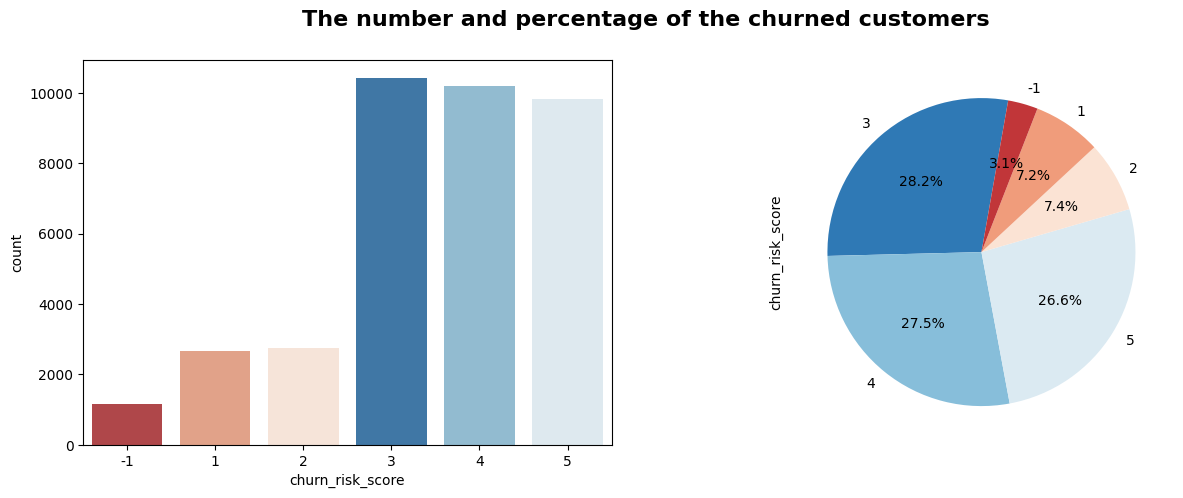

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle("The number and percentage of the churned customers", weight='bold', fontsize=16)


df = data.groupby("churn_risk_score").size()
palette_color = sns.color_palette("RdBu_r", len(df))
rank = df.argsort().argsort()
sns.countplot( x=data["churn_risk_score"], palette=np.array(palette_color[::-1])[rank], ax=ax[0])

palette= sns.color_palette("RdBu_r")
data['churn_risk_score'].value_counts().plot(kind='pie', autopct='%1.1f%%',colors=palette, startangle=80, ax=ax[1])



**According to charts, We can conclude and note the following:**
* The churn rate of the information, we saw the churn rate is divided into 5 levels from low to high (1 to 5). Therefore, following the countplot, the churn_risk_rate attribute appears missing values that are a -1 value.
* The churn rate of customers is quite high because we witnessed the percentage of customers in the 3, 4, and 5 levels are 25% in each level, while the 1 and 2 levels recorded the churn rate of customers is relatively low, which the total percentage of the two levels below 15%

In [ ]:
def count_plot(fig, axes, cols):

  k = 0
  for i in cols:
      if i in ['membership_category','preferred_offer_types','complaint_status','feedback']:
         ax = sns.countplot(x = data[i], palette='RdBu_r',  ax=axes[k])
         ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
      else:
         ax = sns.countplot(x = data[i], palette='RdBu_r',  ax=axes[k])
      k += 1

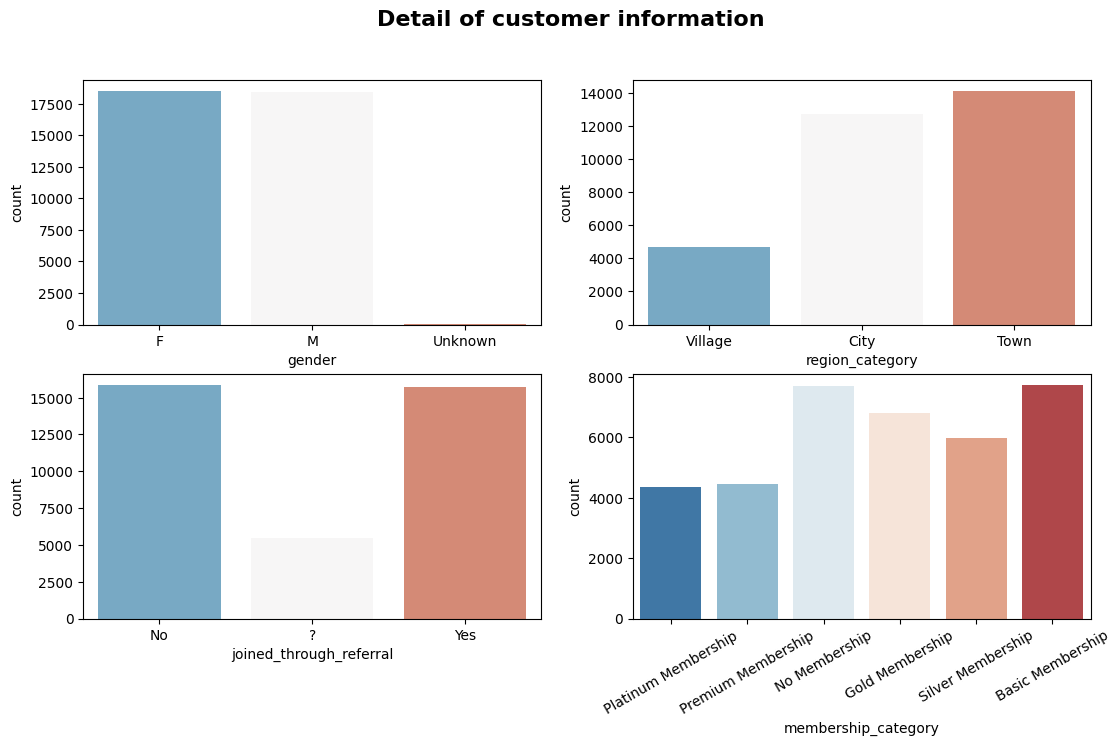

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(13,7))
axes = axes.flatten()
fig.suptitle("Detail of customer information", weight='bold', fontsize=16)
customer = ['gender','region_category','joined_through_referral','membership_category']
count_plot(fig, axes,customer)

**According to charts, We can conclude and note the following:**
* **Gender**: Represents the age of a customer with *F: Female* and *M: Male*, collecting data can be missing information because of appearing the *Unknown* values. A number of the female and male customers is the same.
* The marjority of customers live in **town** and **city**.
* **join_through_referral**: Represents whether a customer joined using any referral code or ID. The collecting or inputting data of the process may be the problem because of appearing the *?* values. Therefore, we are unable to evaluate the accuracy of the message of the attribute which is shown through the graph.
* *About 4000 people* is the number of the platinum and premium customer. Other's member cluster has a higher number,  with *over 6000 people*.

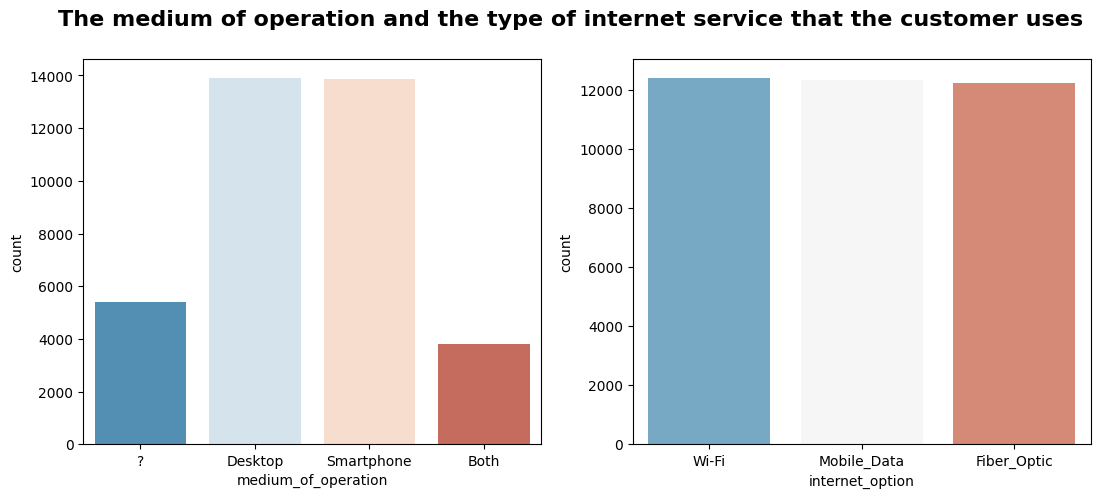

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
axes = axes.flatten()
fig.suptitle("The medium of operation and the type of internet service that the customer uses", weight='bold', fontsize=16)
operation = ['medium_of_operation','internet_option']
count_plot(fig, axes,operation)

**According to charts, We can conclude and note the following:**
*  Similarly **gender**, the **menium_of_operation** attribute is the same problem.
* In all three services, the number of customers using is the same.

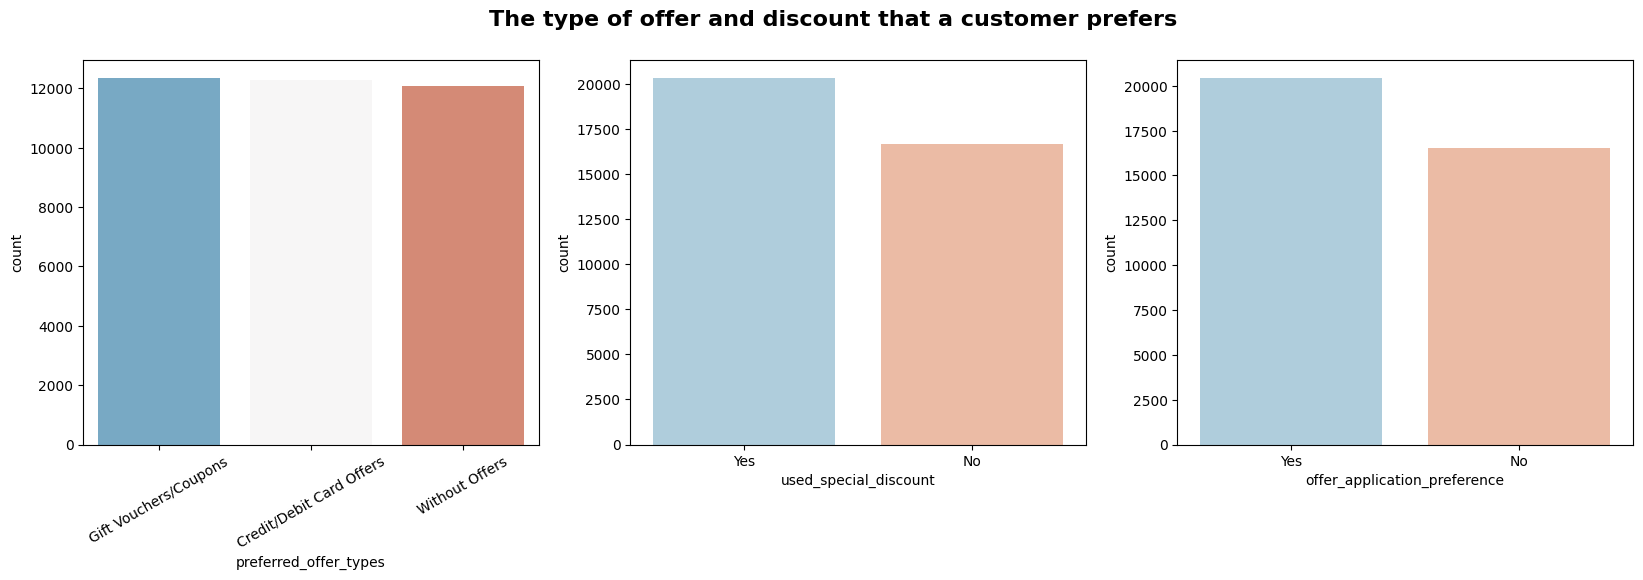

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,5))
axes = axes.flatten()
fig.suptitle("The type of offer and discount that a customer prefers", weight='bold', fontsize=16)
service = ['preferred_offer_types','used_special_discount','offer_application_preference']
count_plot(fig, axes, service)

**According to charts, We can conclude and note the following:**
* the types of Voucher including Gift Vouchers/Counpons, credit/Debit Card Offers are very popular with customers with the number of 12000 people of each type of offer.
* **used_special_discount**, We see that customers are quite fond of special offers.
* Overview based on **offer_application_preffenrence**, The number of customers whether they like and dislike the offer is not too over-diversified.

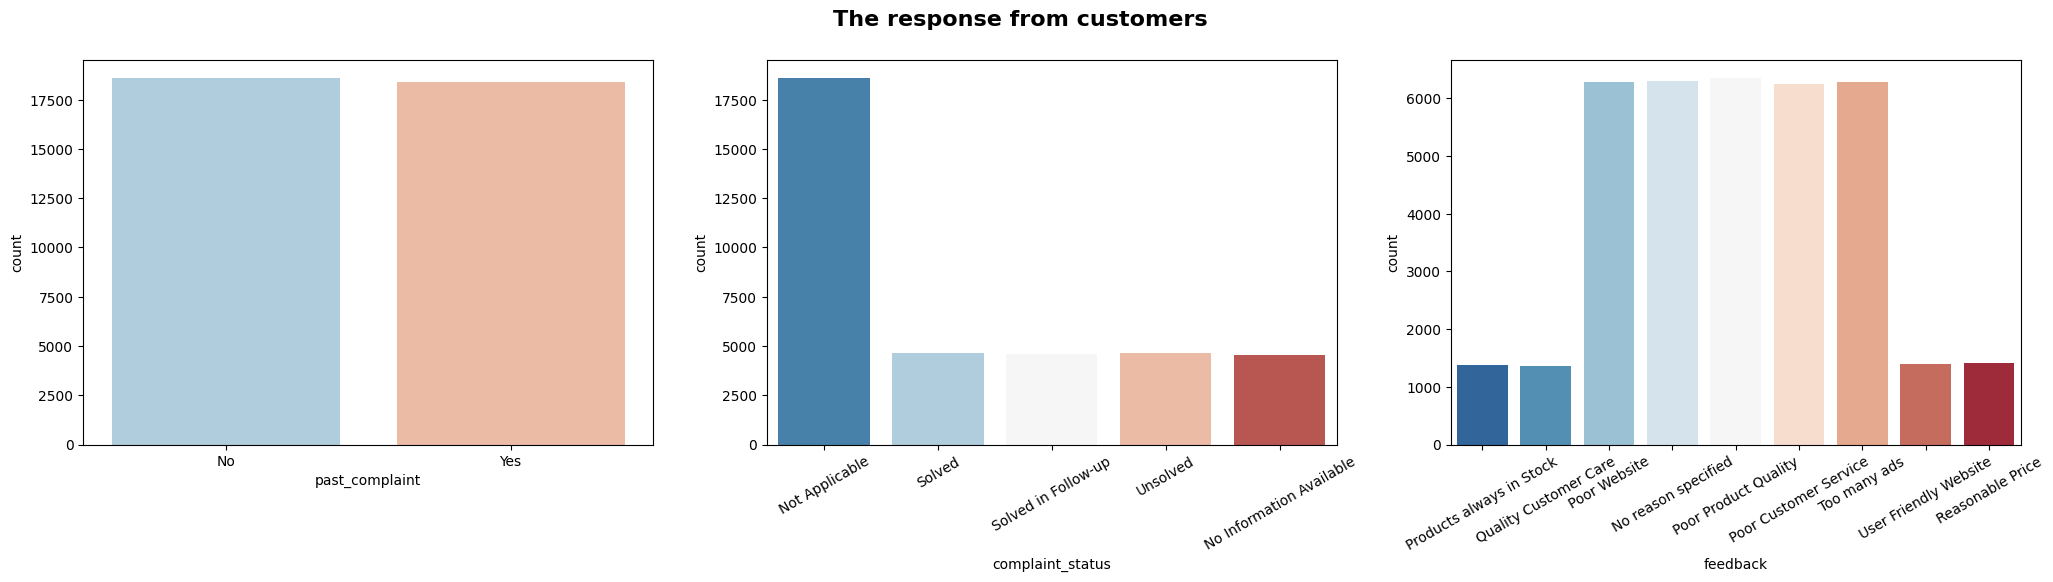

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(25,5))
axes = axes.flatten()
fig.suptitle("The response from customers", weight='bold', fontsize=16)
response = ['past_complaint','complaint_status','feedback']
count_plot(fig, axes,response)

**According to charts, We can conclude and note the following:**
* Around 50% is the number of customers who have made complaints to the company.
* We see that the content of complaints is usually *solved*, *solved in follow-up*, *unsolved*, và *No information Available*. The number of complaint forms for these 4 items is approximately the same, approximately 5000 people each.
* **feedback** from customers mostly complain about **quality, service, website, và too many ads**.

# **Data Preprocessing**

In [ ]:
# Remove the attributes is not useful
columns = ['customer_id','Name','security_no','referral_id','last_visit_time']
data = data.drop(columns = columns)

In [ ]:
data.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


### **Convert the attributes to the correct data type**

The **joining_date attribute**: represents the date when a customer registered as a member. As the attribute is in the form of a date, this poses difficulties in predicting the model. Therefore, instead of using the registration date, we will change it to the number of days that the customer has registered as a member from the registration date to 2018.
-	Why choose 2018?
>To best evaluate the churn rate, we should use years close to the year when this data was collected. Because if we consider the current year, there have been many events affecting the customer churn, such as Covid-19, so the evaluation will no longer be reasonable. Looking at the data, we see that the latest registration year of customers is 2017, so we can choose 2018 as the benchmark year.


In [ ]:
data["joining_date"] =  pd.to_datetime(data["joining_date"])


# create a variable that stores the join date
dates = []
for i in data["joining_date"]:
    i = i.date()
    dates.append(i)

#Create feature number_join_days is the number of days from the date of joining to the beginning of 2018
days = []
d1 = pd.to_datetime('2018-01-01').date()
for i in dates:
  delta = (d1 - i).days
  days.append(delta)

#data["joining_days "] = days
data.insert(loc = 19, column = 'joining_days', value= days)
#data["joining_days "] = pd.to_numeric(data["joining_days "], errors="coerce")
data = data.drop(columns = "joining_date")

## **Non-Standard Missing Values**

The non-standard missing values are replaced with NaN

In [ ]:
data['joined_through_referral'] = data['joined_through_referral'].replace('?',-1)
data['gender'] = data['gender'].replace('Unknown',-1)
data['medium_of_operation'] = data['medium_of_operation'].replace('?',-1)
data['preferred_offer_types'] = data['preferred_offer_types'].replace(np.NaN, -1 )
data['region_category'] = data['region_category'].replace(np.NaN, -1)
data['avg_frequency_login_days'] = data['avg_frequency_login_days'].replace([-999,'Error'],-1)

Why replace missing values with the number -1 instead of NaN?
-	Since:
  >The LabelEncoder method is performed below, and when it performs encoding if it encounters a NaN value the program will throw an error.

  >If missing values are left in the form of '?', 'Unknown', etc., we will face difficulties after performing LabelEncoder. Because LabelEncoder assigns labels to integers (0, 1, 2, etc.), so if we still leave missing values in the mentioned form, they will be assigned an arbitrary number. This makes it difficult for us to determine which integer value the missing values have been assigned to. Therefore, we assign these missing values to the number -1 for easy identification later.


### **Normalize the data**

In [ ]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [ ]:
# Use LabelEncoder to convert category into numeric form.
obj = ['gender', 'region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']

from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in object_cols:
    data.loc[data[i] != -1, i] =LE.fit_transform(data.loc[data[i] != -1, i])

print("All features are now numerical")


All features are now numerical


<ipython-input-376-86fd1e2974ec>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[data[i] != -1, i] =LE.fit_transform(data.loc[data[i] != -1, i])
<ipython-input-376-86fd1e2974ec>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[data[i] != -1, i] =LE.fit_transform(data.loc[data[i] != -1, i])
<ipython-input-376-86fd1e2974ec>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i

In [ ]:
data["avg_frequency_login_days"] =  pd.to_numeric(data["avg_frequency_login_days"])

### **Convert and check the null values**

In [ ]:
obj1 = ['avg_time_spent','churn_risk_score','avg_frequency_login_days','points_in_wallet', 'days_since_last_login']
n = data.shape[0]
for i in obj1:
  for j in range(0,n):
    if float(data.loc[j,i]) < 0:
      data.loc[j,i] = np.NaN

In [ ]:
cols_minus = ['preferred_offer_types', 'joined_through_referral','medium_of_operation','gender', 'region_category']
data.loc[:,cols_minus] = data.loc[:,cols_minus].replace(-1, np.NaN)


<ipython-input-379-c3957a20cb82>:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,cols_minus] = data.loc[:,cols_minus].replace(-1, np.NaN)


In [ ]:
def check_nan(data):
  null_values = data.isnull().sum()
  percent_null_value = null_values*100/data.shape[0]

  columns = {'missing_values': null_values, 'percentage': round(percent_null_value,2)}
  missing_values = pd.DataFrame(columns)

  display(missing_values.sort_values(by='missing_values', ascending=False))

In [ ]:
check_nan(data)

,missing_values,percentage
joined_through_referral,5438,14.70
region_category,5428,14.67
medium_of_operation,5393,14.58
points_in_wallet,3579,9.68
avg_frequency_login_days,3522,9.52
days_since_last_login,1999,5.40
avg_time_spent,1719,4.65
churn_risk_score,1163,3.14
preferred_offer_types,288,0.78
gender,59,0.16


## **Handle missing value**

### **For Atributes**

#### **KNNImputer - Numerical Data**

In [ ]:
# Numerical data
numeri_data = data.loc[:,['points_in_wallet','avg_time_spent','avg_frequency_login_days']]

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 10)
data.loc[:,['points_in_wallet','avg_time_spent','avg_frequency_login_days']] = imputer.fit_transform(numeri_data)

#### **SimpleImputer - Categorical Data**

In [ ]:
# Categorical data
category_cols = ['joined_through_referral', 'region_category', 'medium_of_operation',
               'preferred_offer_types', 'gender','days_since_last_login']
category_data = data.loc[:, category_cols]

In [ ]:
from sklearn.impute import SimpleImputer
# Training model
Imputer = SimpleImputer(strategy='most_frequent')
# Transform a data set labeled with no missing values
data.loc[:, category_cols] = Imputer.fit_transform(category_data)


### **For label**

In [ ]:
# Split the dataset into train_data and missing_data
# Train_data: data set used to train and test the performance of the used model. Note: data does not include labels missing values
# missing_data: the dataset has missing values in the label column that need to be predicted

train_data = data[np.isnan(data['churn_risk_score']) == False]
missing_data = data[np.isnan(data['churn_risk_score']) == True]

In [ ]:
from sklearn.model_selection import train_test_split

X = train_data.drop(columns = 'churn_risk_score')
y = train_data['churn_risk_score']

# Split the dataset into training and testing sets
RANDOM_STATE = 2023
TRAIN_SIZE = 0.85
trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
#Training model
# Evaluate the performance of the model
def handle_missingValue_model(X, y):

    # Todo: Input your scaler and logistic model into pipeline
    model = make_pipeline(StandardScaler(),  XGBClassifier(random_state= 42))
    # Todo: fit your model with X, y
    model.fit(X,y)

    return model

clf = handle_missingValue_model(trainX, trainY - 1)

# Predict the class labels for the test set
pred =  clf.predict(testX)

# Evaluate the performance of the model
accuracy = accuracy_score(testY - 1, pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 77.58%


In [ ]:
# Predict the class label for the missing_data
data.loc[np.isnan(data['churn_risk_score']) == True,'churn_risk_score'] = clf.predict(missing_data.drop(columns = 'churn_risk_score')) + 1

In [ ]:
print('Check the missing value in the dataset: ',data.isnull().sum().sum())

Check the missing value in the dataset:  0


## **Check the outlier**

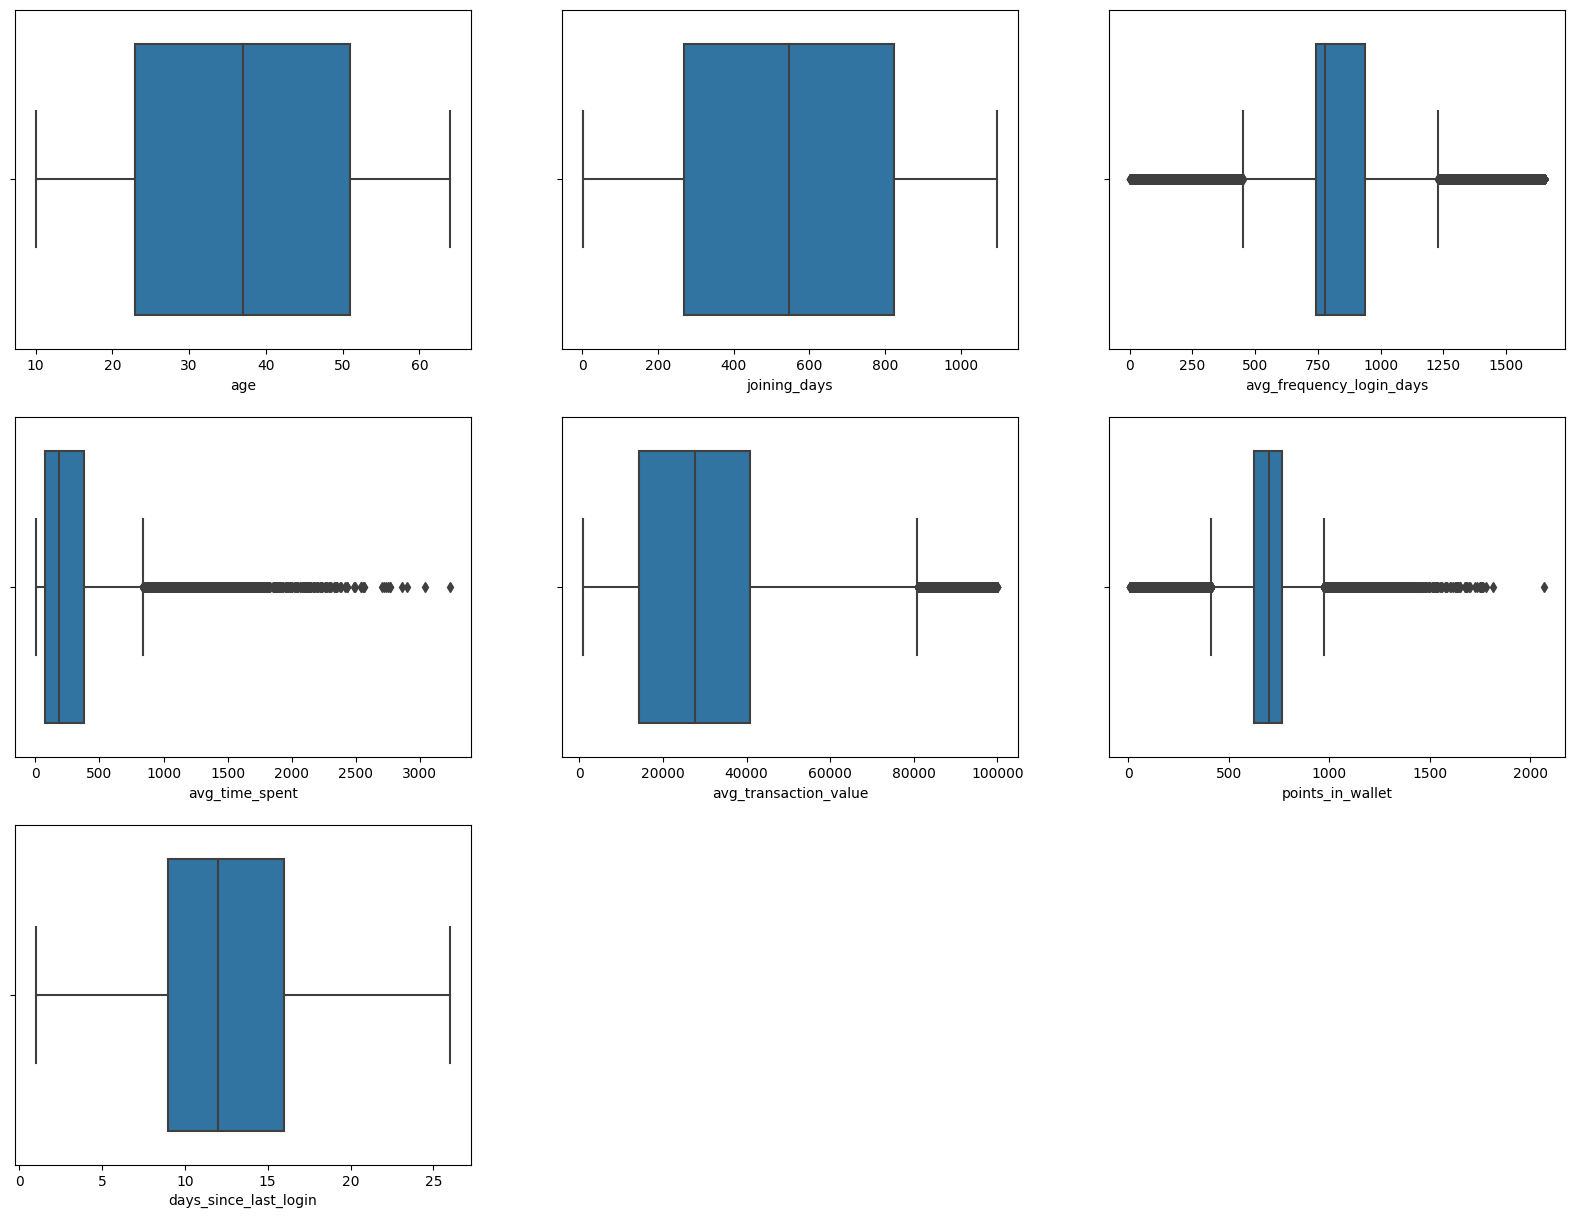

In [ ]:
import matplotlib.pyplot as plt
feature = ['age', 'joining_days','avg_frequency_login_days','avg_time_spent','avg_transaction_value', 'points_in_wallet','days_since_last_login']

fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(20, 15))
for variable, subplot in zip(feature,ax.flatten()):
    z = sns.boxplot(x = data[variable], orient = "h",whis=1.5 , ax=subplot)
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
plt.show()

**Based on the Boxplot chart, we have the following comments:**

- Attributes: **points_in_wallet**, **avg_time_spent** contain outliers values

In [ ]:
col_list = ['points_in_wallet','avg_time_spent']

for col in col_list:
    value = data[col].astype(float)
    Q1, Q3 = np.percentile(value, [25, 75])
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].median(), data[col])

# **Feature Engineering**

In [ ]:
# Sử dụng hàm replace để chuyển đổi các giá trị trong cột
data['churn_risk_score'] = data['churn_risk_score'] - 1

In [ ]:
df = data.copy()

<Axes: >

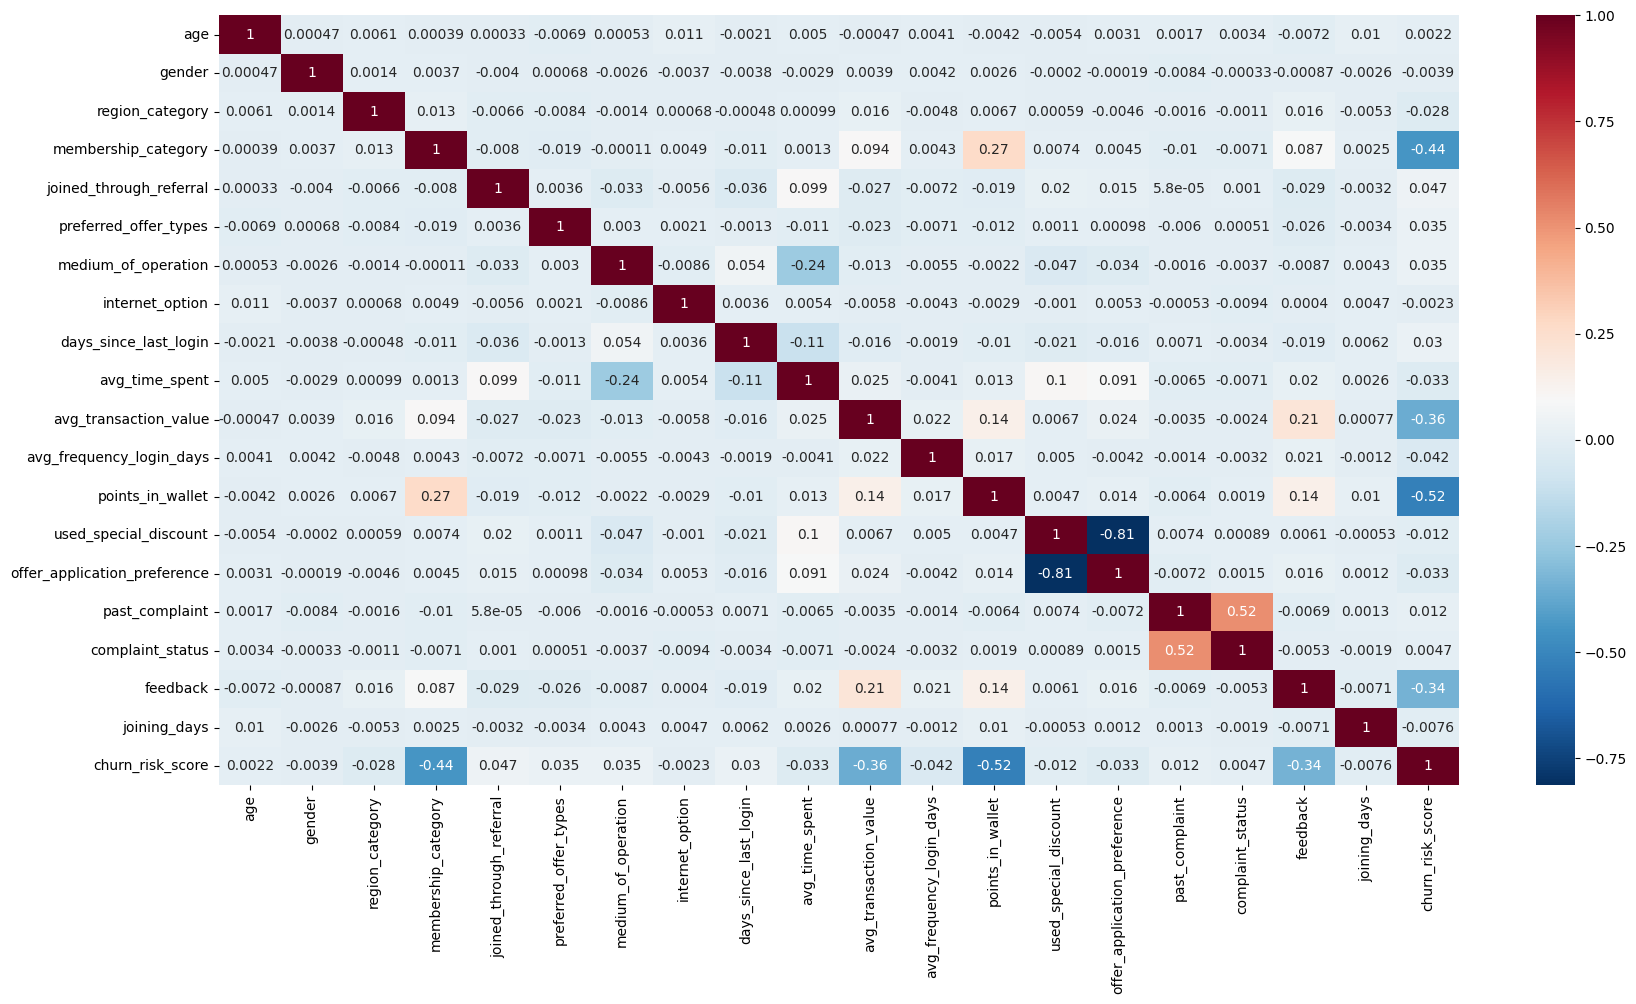

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(),annot = True, cmap="RdBu_r") # Show heatmap after normalized data

* **Looking at the heatmap graph, we can see properties:**
  - **feedback**, **points_in_wallet**, **avg_frequency_login_days**, **avg_transaction_value**, **membership_category** are strongly correlated with **churn_risk_score**.

<Axes: xlabel='avg_transaction_value', ylabel='points_in_wallet'>

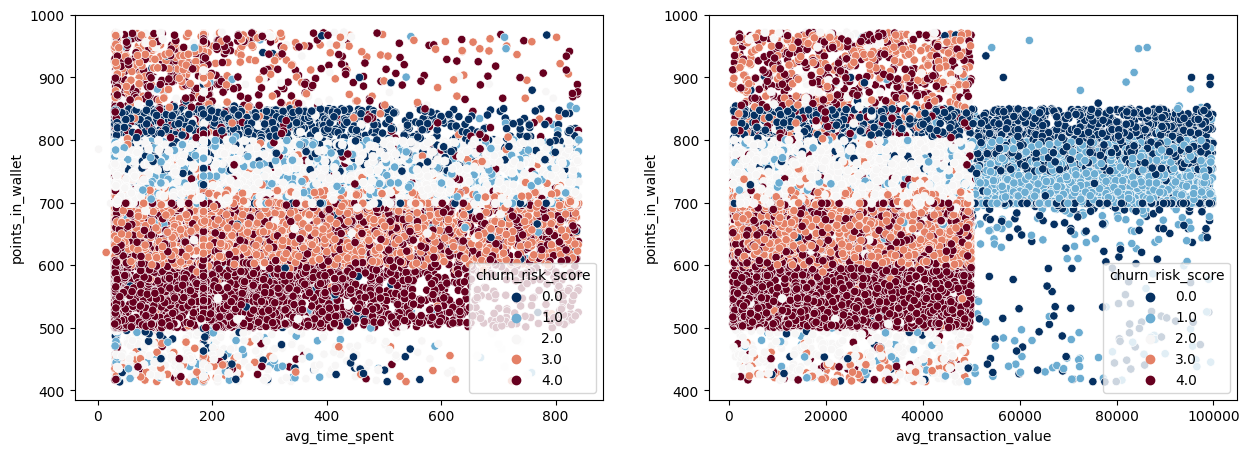

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.scatterplot(data=df, x="avg_time_spent", y="points_in_wallet", hue="churn_risk_score", palette='RdBu_r', ax = ax[0])

sns.scatterplot(data=df, x="avg_transaction_value", y="points_in_wallet", hue="churn_risk_score", palette='RdBu_r', ax = ax[1])


**According to charts, We can conclude and note the following:**
- Some customers, who have low churn rate, have the high average transaction value, thus their wallet score is quite high.

## **Standard Scaler data**

In [ ]:
from sklearn.preprocessing import StandardScaler

def Standard_Scaler(df,feature):
  df_scaled = df.loc[:,feature]

  # Scaling
  scaled = StandardScaler()
  scaled.fit_transform(df_scaled)
  return scaled.fit_transform(df_scaled)

In [ ]:
feature = ['age', 'joining_days','avg_frequency_login_days','avg_time_spent','avg_transaction_value', 'points_in_wallet','days_since_last_login']
df_scaled = Standard_Scaler(df,feature)
df_scaled = pd.DataFrame(df_scaled, columns = feature)
print("All features are now scaled")
df_scaled.head()

All features are now scaled


,age,joining_days,avg_frequency_login_days,avg_time_spent,avg_transaction_value,points_in_wallet,days_since_last_login
0,-1.204886,-1.286093,-0.564415,0.458314,1.220602,1.080038,0.789743
1,-0.322562,-1.320699,-0.605236,0.489972,-0.845112,0.197126,0.605328
2,0.433715,-0.408338,-0.468195,1.653250,-0.423985,-2.268212,0.236500
3,-0.007447,-0.367439,2.033517,-0.913093,-0.207340,-1.470403,-0.316743
4,-0.385585,-1.367890,-0.573162,-0.581219,-0.246215,-0.333908,1.342985


In [ ]:
feature.append('churn_risk_score')
df = pd.concat([df.drop(columns = feature),df_scaled], axis=1 )
df = pd.concat([df,data['churn_risk_score']], axis=1 )
df.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,age,joining_days,avg_frequency_login_days,avg_time_spent,avg_transaction_value,points_in_wallet,days_since_last_login,churn_risk_score
0,0.0,2.0,3,0.0,1.0,1.0,2,1,1,0,1,4,-1.204886,-1.286093,-0.564415,0.458314,1.220602,1.080038,0.789743,1.0
1,0.0,0.0,4,0.0,1.0,1.0,1,1,0,1,2,5,-0.322562,-1.320699,-0.605236,0.489972,-0.845112,0.197126,0.605328,0.0
2,0.0,1.0,2,1.0,1.0,1.0,2,0,1,1,3,3,0.433715,-0.408338,-0.468195,1.653250,-0.423985,-2.268212,0.236500,4.0
3,1.0,0.0,2,1.0,1.0,1.0,1,0,1,1,4,3,-0.007447,-0.367439,2.033517,-0.913093,-0.207340,-1.470403,-0.316743,4.0
4,0.0,0.0,2,0.0,0.0,2.0,1,0,1,1,2,3,-0.385585,-1.367890,-0.573162,-0.581219,-0.246215,-0.333908,1.342985,4.0


## **Split data into X and y**

In [ ]:
def prepare_X_y(df):

    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(columns = ['churn_risk_score'])
    y = df['churn_risk_score']
    return X, y

X, y = prepare_X_y(df)

# **Model Part**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## **Train-test split**

In [ ]:
def Train_Test_Split(X,y):
  RANDOM_STATE = 2023
  TRAIN_SIZE = 0.80
  trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
  return trainX, testX ,trainY, testY

trainX, testX ,trainY, testY = Train_Test_Split(X,y)

## **Build SK-learn model**

In [ ]:
def calculate_performance(model,x,y):
  # Compare on training dataset
  pred = model.predict(x)
  print('\t\t    CLASSIFICATION REPORT \n')
  print(classification_report(y,pred))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#confusion matrix
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)

    cm = confusion_matrix(y_actual, y_predict, labels=[0,1,2,3,4])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0","1","2","3","4"])
    disp.plot(cmap='Blues',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(axis='both',which='both',visible=False)
    plt.show()

### **Support Vector  Machine**

In [ ]:
from sklearn.svm import SVC

# Training model
svc = SVC(C = 1, kernel = 'rbf')
svc.fit(trainX,trainY)

# Report
calculate_performance(svc, testX, testY)

		    CLASSIFICATION REPORT 

              precision    recall  f1-score   support

         0.0       0.68      0.57      0.62       538
         1.0       0.69      0.64      0.66       562
         2.0       0.73      0.84      0.78      2188
         3.0       0.57      0.64      0.60      2068
         4.0       0.71      0.54      0.62      2043

    accuracy                           0.67      7399
   macro avg       0.68      0.65      0.66      7399
weighted avg       0.67      0.67      0.67      7399



In [ ]:
model_scores = cross_val_score(svc, trainX, trainY, cv=10)
print("CV average score: %.2f" % model_scores.mean())

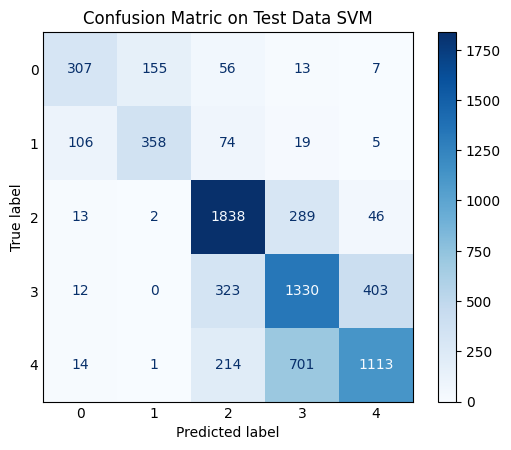

In [ ]:
y_predict_test_svm = svc.predict(testX)
make_confusion_matrix(testY,y_predict_test_svm,"Confusion Matric on Test Data SVM")

**Review:** Using the Confusion Matrix to assess the alignment between actual values and predictions after building an SVM model.

- Overall, the number of correctly predicted values for each label is quite high compared to the total.

- However, the mispredicted values are distributed across different labels in a scattered manner.

### **XGBoost**

In [ ]:
from xgboost import XGBClassifier
#Training model
xgb = XGBClassifier()
xgb.fit(trainX, trainY)

# Report
calculate_performance(xgb, testX, testY)

		    CLASSIFICATION REPORT 

              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75       538
         1.0       0.77      0.72      0.74       562
         2.0       0.92      0.91      0.92      2188
         3.0       0.70      0.58      0.64      2068
         4.0       0.71      0.84      0.77      2043

    accuracy                           0.78      7399
   macro avg       0.77      0.77      0.76      7399
weighted avg       0.78      0.78      0.77      7399



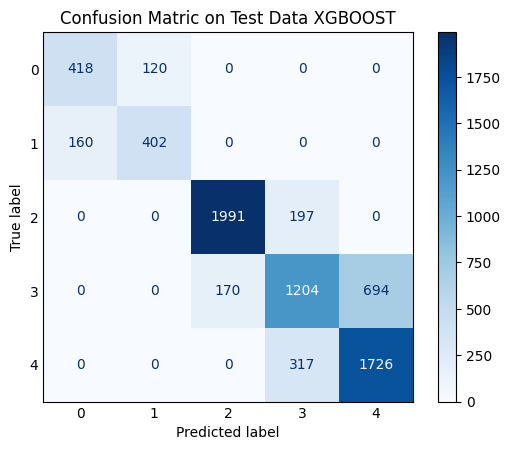

In [ ]:
y_predict_test_xgb = xgb.predict(testX)
make_confusion_matrix(testY,y_predict_test_xgb,"Confusion Matric on Test Data XGBOOST")

Nhận xét: Dùng Confusion Matrix để xem giá trị thực tế với giá trị dự đoán có đúng hay không sau khi buil model XGBoost
- Nhìn chung số giá trị dự đoán đúng của từng labels khá cao so với tổng thể
- Phạm vi giá trị dự đoán sai của từng label là **[label - 1, label + 1]** .
  >Tuy nhiên label 2 và 3 không bị nhầm lẫn với nhau. Từ đây ta thấy được rằng đồ thị trên được phân tách thành 2 cụm khá rõ rệt với cụm 1 bao gồm các labels {1,2} và cụm 2 gồm các lablels {3,4,5}. Vì vậy, nếu như ta chia cột target thành 2 labels chính như trên thì khả năng dự đoán đúng của XGBoost là rất cao

  >Tại sao giá trị dự đoán lại ở phạm vi đó?
  Vì trong quá trình fill Missing value thì giá trị đó được fill bằng cách như: những điểm gần nó nhất, những giá trị chiếm tần suất cao nhất

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
# Training model
logis = LogisticRegression(multi_class = 'multinomial', max_iter = 5000)
logis.fit(trainX,trainY)

# Report
calculate_performance(logis,testX,testY)

		    CLASSIFICATION REPORT 

              precision    recall  f1-score   support

         0.0       0.55      0.46      0.50       538
         1.0       0.51      0.39      0.44       562
         2.0       0.65      0.75      0.69      2188
         3.0       0.42      0.34      0.37      2068
         4.0       0.60      0.68      0.63      2043

    accuracy                           0.57      7399
   macro avg       0.55      0.52      0.53      7399
weighted avg       0.55      0.57      0.56      7399



### **Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
# Training model
gnb = GaussianNB()
gnb.fit(trainX, trainY)
# Report
calculate_performance(gnb, testX, testY)

		    CLASSIFICATION REPORT 

              precision    recall  f1-score   support

         0.0       0.58      0.45      0.51       538
         1.0       0.52      0.41      0.46       562
         2.0       0.67      0.70      0.68      2188
         3.0       0.48      0.25      0.33      2068
         4.0       0.46      0.72      0.56      2043

    accuracy                           0.54      7399
   macro avg       0.54      0.51      0.51      7399
weighted avg       0.54      0.54      0.52      7399



### **K-nearest neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#Training model
neigh = KNeighborsClassifier(n_neighbors= 20)
neigh.fit(trainX, trainY)

# Report
calculate_performance(neigh, testX, testY)

		    CLASSIFICATION REPORT 

              precision    recall  f1-score   support

         0.0       0.66      0.51      0.57       538
         1.0       0.68      0.44      0.54       562
         2.0       0.71      0.81      0.76      2188
         3.0       0.52      0.53      0.52      2068
         4.0       0.65      0.63      0.64      2043

    accuracy                           0.63      7399
   macro avg       0.64      0.58      0.61      7399
weighted avg       0.63      0.63      0.63      7399



### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(trainX, trainY)

# Report
calculate_performance(rfc, testX, testY)

		    CLASSIFICATION REPORT 

              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74       538
         1.0       0.76      0.76      0.76       562
         2.0       0.91      0.92      0.92      2188
         3.0       0.68      0.60      0.64      2068
         4.0       0.72      0.81      0.76      2043

    accuracy                           0.77      7399
   macro avg       0.77      0.76      0.76      7399
weighted avg       0.77      0.77      0.77      7399



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state= 42)
pipe = Pipeline(steps=[("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"]
    }

search = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=2)
search.fit(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

calculate_performance(search, testX, testY)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'tree__criterion': 'gini'}
		    CLASSIFICATION REPORT 

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.75       538
         1.0       0.76      0.75      0.76       562
         2.0       0.91      0.92      0.91      2188
         3.0       0.69      0.60      0.64      2068
         4.0       0.72      0.82      0.77      2043

    accuracy                           0.78      7399
   macro avg       0.77      0.77      0.77      7399
weighted avg       0.77      0.78      0.77      7399



### **Choose important features**

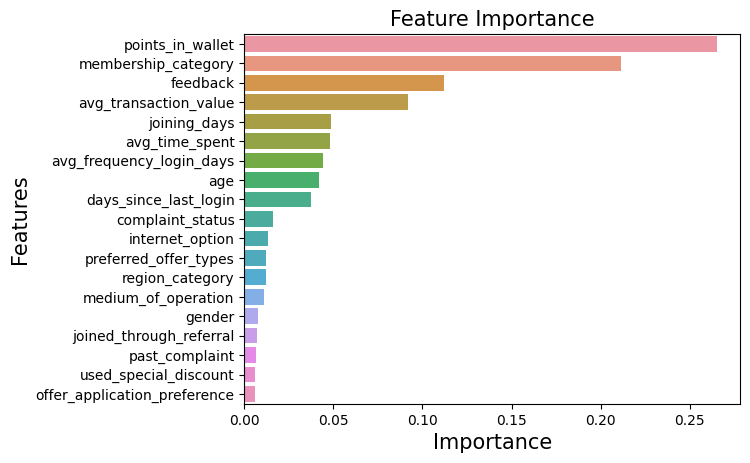

In [ ]:
important_features = pd.DataFrame({'Features': trainX.columns,
                                   'Importance': rfc.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

In [ ]:
# create a new dataset with many important features
Features = important_features[important_features.Importance > 0.030].Features
selective_data = data.loc[:,Features]

In [ ]:
# feature engineering
scaled = Standard_Scaler(selective_data,Features)
df_scaled = pd.DataFrame(scaled, columns = Features)

selective_data = pd.concat([selective_data.drop(columns = Features),df_scaled], axis=1 )
selective_data = pd.concat([selective_data, data['churn_risk_score']], axis=1 )
selective_data.head()

,points_in_wallet,membership_category,feedback,avg_transaction_value,joining_days,avg_time_spent,avg_frequency_login_days,age,days_since_last_login,churn_risk_score
0,1.080038,0.436208,0.361999,1.220602,-1.286093,0.458314,-0.564415,-1.204886,0.789743,1.0
1,0.197126,1.012029,0.752500,-0.845112,-1.320699,0.489972,-0.605236,-0.322562,0.605328,0.0
2,-2.268212,-0.139612,-0.028502,-0.423985,-0.408338,1.653250,-0.468195,0.433715,0.236500,4.0
3,-1.470403,-0.139612,-0.028502,-0.207340,-0.367439,-0.913093,2.033517,-0.007447,-0.316743,4.0
4,-0.333908,-0.139612,-0.028502,-0.246215,-1.367890,-0.581219,-0.573162,-0.385585,1.342985,4.0


In [ ]:
# Split data into X and y
X, y = prepare_X_y(selective_data)
# Train-test split
train_X, test_X ,train_Y, test_Y = Train_Test_Split(X,y)

In [ ]:
def TrainingModels(train_X, train_Y):
  svc = SVC(C = 1, kernel = 'rbf').fit(train_X, train_Y)
  xgb = XGBClassifier().fit(train_X, train_Y)
  logis = LogisticRegression(multi_class = 'multinomial', max_iter = 2000).fit(train_X, train_Y)
  gnb = GaussianNB().fit(train_X, train_Y)
  neigh = KNeighborsClassifier(n_neighbors=20).fit(train_X, train_Y)
  rfc = RandomForestClassifier(random_state = 42, criterion = 'gini').fit(train_X, train_Y)

  return [svc, xgb, logis,gnb, neigh, rfc]


In [ ]:
def labels_predict(models, X):
  train_pred = []
  for i in models:
    train_pred.append(i.predict(X))

  return train_pred

In [ ]:
def accuracy_scores(models,train_pred, y):
  accuracies = []
  for i in range(len(models)):
      accuracies.append(accuracy_score(y, train_pred[i]))

  return accuracies

In [ ]:
def recall_scores(models,train_pred, y):

  recalls = []
  for i in range(len(models)):
      recalls.append(recall_score(y, train_pred[i], average='macro'))

  return recalls

In [ ]:
def precision_scores(models,train_pred, y):

  precisions = []
  for i in range(len(models)):
      precisions.append(precision_score(y, train_pred[i],average='macro'))

  return precisions

In [ ]:
def f1_scores(models,train_pred, y):

  f1_scores = []
  for i in range(len(models)):
      f1_scores.append(f1_score(y, train_pred[i], average='macro'))

  return f1_scores

In [ ]:
models = TrainingModels(train_X, train_Y)
# Predict the train dataset
pre_trainY = labels_predict(models, train_X)
accuracies_train = accuracy_scores(models, pre_trainY, train_Y)

# Predict the test dataset
pre_testY = labels_predict(models, test_X)
accuracy = accuracy_scores(models, pre_testY, test_Y)
precision = precision_scores(models, pre_testY, test_Y)
recall = recall_scores(models, pre_testY, test_Y)
f1  = f1_scores(models, pre_testY, test_Y)

In [ ]:
temp = {'Model':['SVM','XGBoost Classifier','Logistic','Gausian','KNN','Random Forest'],
       'Train accuracy': accuracies_train, 'Test accuracy': accuracy, 'precision': precision,'recall': recall, 'f1': f1}
dataframe = pd.DataFrame(temp)
dataframe

,Model,Train accuracy,Test accuracy,precision,recall,f1
0,SVM,0.687460,0.663198,0.670789,0.616034,0.633890
1,XGBoost Classifier,0.931065,0.782673,0.773394,0.773324,0.770751
2,Logistic,0.557666,0.565752,0.540746,0.516735,0.523716
3,Gausian,0.540905,0.537911,0.539588,0.502244,0.504512
4,KNN,0.684790,0.642654,0.643565,0.575631,0.597755
5,Random Forest,1.000000,0.779970,0.772179,0.771157,0.769422


### **Build Model with new labels**

In [ ]:
dataset = data.copy()
# Use the replace function to convert the values in the column
dataset['churn_risk_score'] = dataset['churn_risk_score'].replace({1: 0, 2: 0, 3: 1, 4: 1, 5: 1})

In [ ]:
feature = ['age', 'joining_days','avg_frequency_login_days','avg_time_spent','avg_transaction_value', 'points_in_wallet','days_since_last_login']
da_scaled = Standard_Scaler(dataset,feature)
da_scaled = pd.DataFrame(da_scaled, columns = feature)
print("All features are now scaled")
da_scaled.head()

All features are now scaled


,age,joining_days,avg_frequency_login_days,avg_time_spent,avg_transaction_value,points_in_wallet,days_since_last_login
0,-1.204886,-1.286093,-0.564415,0.458314,1.220602,1.080038,0.789743
1,-0.322562,-1.320699,-0.605236,0.489972,-0.845112,0.197126,0.605328
2,0.433715,-0.408338,-0.468195,1.653250,-0.423985,-2.268212,0.236500
3,-0.007447,-0.367439,2.033517,-0.913093,-0.207340,-1.470403,-0.316743
4,-0.385585,-1.367890,-0.573162,-0.581219,-0.246215,-0.333908,1.342985


In [ ]:
feature.append('churn_risk_score')
target = dataset['churn_risk_score']
dataset = pd.concat([dataset.drop(columns = feature),da_scaled], axis=1 )
dataset = pd.concat([dataset,target], axis=1 )
dataset.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,age,joining_days,avg_frequency_login_days,avg_time_spent,avg_transaction_value,points_in_wallet,days_since_last_login,churn_risk_score
0,0.0,2.0,3,0.0,1.0,1.0,2,1,1,0,1,4,-1.204886,-1.286093,-0.564415,0.458314,1.220602,1.080038,0.789743,0.0
1,0.0,0.0,4,0.0,1.0,1.0,1,1,0,1,2,5,-0.322562,-1.320699,-0.605236,0.489972,-0.845112,0.197126,0.605328,0.0
2,0.0,1.0,2,1.0,1.0,1.0,2,0,1,1,3,3,0.433715,-0.408338,-0.468195,1.653250,-0.423985,-2.268212,0.236500,1.0
3,1.0,0.0,2,1.0,1.0,1.0,1,0,1,1,4,3,-0.007447,-0.367439,2.033517,-0.913093,-0.207340,-1.470403,-0.316743,1.0
4,0.0,0.0,2,0.0,0.0,2.0,1,0,1,1,2,3,-0.385585,-1.367890,-0.573162,-0.581219,-0.246215,-0.333908,1.342985,1.0


In [ ]:
# Split data into X and y
X_new, y_new = prepare_X_y(dataset)
# Train-test split
trainX_new, testX_new ,trainY_new, testY_new = Train_Test_Split(X_new,y_new)

In [ ]:
models = TrainingModels(trainX_new, trainY_new)
# Predict the train dataset
pre_trainY = labels_predict(models, trainX_new)
accuracies_train = accuracy_scores(models, pre_trainY, trainY_new)

# Predict the test dataset
pre_testY = labels_predict(models, testX_new)
accuracy = accuracy_scores(models, pre_testY, testY_new)
precision = precision_scores(models, pre_testY, testY_new)
recall = recall_scores(models, pre_testY, testY_new)
f1  = f1_scores(models, pre_testY, testY_new)

temp = {'Model':['SVM','XGBoost Classifier','Logistic','Gausian','KNN','Random Forest'],
       'Train accuracy': accuracies_train, 'Test accuracy': accuracy, 'precision': precision,'recall': recall, 'f1': f1}
dataframe = pd.DataFrame(temp)
dataframe

,Model,Train accuracy,Test accuracy,precision,recall,f1
0,SVM,0.874396,0.871739,0.871786,0.867926,0.869506
1,XGBoost Classifier,0.987801,0.948101,0.947500,0.947390,0.947445
2,Logistic,0.814922,0.823895,0.822153,0.820547,0.821262
3,Gausian,0.814652,0.822273,0.821244,0.817748,0.819139
4,KNN,0.879803,0.866063,0.866697,0.861508,0.863510
5,Random Forest,1.000000,0.947560,0.946787,0.947056,0.946920


# **Discussion & Conclusion**

**Comment:**
- XGBoost and Random Forest Classification algorithms give the highest prediction results with 78% when using classification model measure acccuracy
- After selecting the important attributes, we observed that the results did not change significantly in comparison to using all the attributes. From this observation, we can conclude that the unimportant attributes do not have much impact on the model's performance.
- According to the confusion matrix chart to evaluate the accuracy of classification models such as XGBoost and SVM, the mispredicted values of a label are usually distributed to the neighboring labels, and we can divide them into two clusters ({1,2} and {3,4,5}) that are often confused with each other. Therefore, we created a new target attribute with two labels of 0 and 1, respectively, corresponding to these two clusters. Overall, the prediction accuracy of the models improved significantly with a rate above 80%, and the highest rate achieved was 94%.


To retain customers, we need the following solutions:

**1. Website Improvement:**
Our website should boast a sleek design, user-friendly interface, detailed product/service information, transparent pricing, and comprehensive customer care and quality assurance policies. A well-crafted website not only leaves a positive impression but also facilitates easy navigation and understanding of our offerings.

**2. Product Quality:**
The quality of our products significantly influences customer trust. If our products meet high standards, customers are more likely to repurchase from us rather than exploring alternatives. Prioritizing product quality is paramount in establishing long-term relationships with customers.

**3. Professional Customer Service:**
A dedicated and professional customer service team is a crucial factor in customer retention. Employees should be well-trained to address customer issues promptly and effectively. This commitment to customer satisfaction fosters loyalty and increases the likelihood of repeat business.

**4. Reduce Advertising Clutter:**
Excessive advertising can create discomfort for customers and deter them from making future purchases. It's essential to streamline advertising messages, focusing on strategies that are effective without overwhelming the customer. This approach helps maintain customer interest without causing irritation.

**Conclusion:**
By combining website enhancement, product quality assurance, professional customer service, and a mindful advertising strategy, we can enhance our customer retention capabilities. Long-term relationships built on trust and satisfaction are key to sustained success in business.



